In [496]:
import pandas as pd
import numpy as np

In [497]:
sms = pd.read_csv("ds3/spam.csv", encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']

sms

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [498]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [499]:
from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()
sms['label_num'] = label_encoder1.fit_transform(sms.label)
encoded_type1 = dict(enumerate(label_encoder1.classes_))
encoded_type1

{0: 'ham', 1: 'spam'}

In [500]:
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [501]:
import string
from nltk.corpus import stopwords
import re

def text_process(mess):
    # Check characters to see if they are in punctuation
    text_without_punctuation = re.sub(r'[^a-zA-Z]', ' ', mess).lower()
    STOPWORDS = stopwords.words('english') + ['u']
    # Join the characters again to form the string.
    return ' '.join([word for word in text_without_punctuation.split() if word.lower() not in STOPWORDS])
    # return ' '.join([word for word in nopunc.split()])

In [502]:
sms['clean_msg'] = sms.message.apply(text_process)
sms.head()

,label,message,label_num,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think goes usf lives around though


In [503]:
from sklearn.model_selection import train_test_split

X1 = sms.clean_msg
y1 = sms.label_num
print(X1.shape)
print(y1.shape)

def get_train_test(X, y, ratio=0.5):
     return train_test_split(X, y, train_size=ratio)

X_train1, X_test1, y_train1, y_test1 = get_train_test(X1, y1, 0.7)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(5572,)
(5572,)
(3900,)
(1672,)
(3900,)
(1672,)


In [504]:
from collections import Counter

def get_cl_words(X_train, y_train, cl):
    words = []
    for rowx, rowy in zip(X_train, y_train):
        if rowy == cl:
            for word in rowx.split():
                words.append(word.lower())
    words_count = Counter()
    words_count.update(words)
    return words_count

def get_all_words(X_train):
    words = []
    for row in X_train:
        for word in row.split():
            words.append(word.lower())
    words_count = Counter()
    words_count.update(words)
    return words_count

all_words1 = get_all_words(X_train1)
ham_words = get_cl_words(X_train1, y_train1, 0)
spam_words = get_cl_words(X_train1, y_train1, 1)
all_words1.most_common(10)

[('call', 431),
 ('get', 281),
 ('ur', 258),
 ('gt', 231),
 ('lt', 228),
 ('ok', 209),
 ('free', 207),
 ('go', 200),
 ('know', 185),
 ('like', 184)]

In [505]:
def get_probs(all_words, cl_words):
    probs = {}
    for word in all_words:
        n_total = all_words[word]
        probs[word] = []
        for cl_word in cl_words:
            n_cl = cl_word[word]
            # p_cl = n_cl / n_total
            p_cl = (n_cl + 0.5) / (n_total + 1)
            probs[word].append(p_cl)
    return probs

probs1 = get_probs(all_words1, [ham_words, spam_words])
def_probs1 = [y_train1.value_counts()[i]/len(y_train1) for i in range(len(encoded_type1))]
print(def_probs1)
probs1

[0.8625641025641025, 0.13743589743589743]


{'get': [0.7712765957446809, 0.22872340425531915],
 'tomorrow': [0.8863636363636364, 0.11363636363636363],
 'send': [0.6094890510948905, 0.3905109489051095],
 'photoshop': [0.75, 0.25],
 'makes': [0.96875, 0.03125],
 'computer': [0.6111111111111112, 0.3888888888888889],
 'shut': [0.875, 0.125],
 'yep': [0.9444444444444444, 0.05555555555555555],
 'fine': [0.9868421052631579, 0.013157894736842105],
 'ice': [0.9166666666666666, 0.08333333333333333],
 'age': [0.18, 0.82],
 'see': [0.9095238095238095, 0.09047619047619047],
 'prolly': [0.875, 0.125],
 'yeah': [0.9923076923076923, 0.007692307692307693],
 'probably': [0.9761904761904762, 0.023809523809523808],
 'gonna': [0.9883720930232558, 0.011627906976744186],
 'swing': [0.9375, 0.0625],
 'wee': [0.8333333333333334, 0.16666666666666666],
 'bit': [0.9827586206896551, 0.017241379310344827],
 'married': [0.5833333333333334, 0.4166666666666667],
 'local': [0.1, 0.9],
 'women': [0.5, 0.5],
 'looking': [0.6578947368421053, 0.34210526315789475],
 

In [506]:
def get_prediction(rows, probs, def_probs):
    y_pred = []
    p_cl = np.ones(len(def_probs))/len(def_probs)
    for row in rows:
        row_words = Counter()
        row_words.update([word.lower() for word in row.split()])
        p = np.copy(p_cl)
        for word in row_words:
            if word in probs:
                for i in range(len(def_probs)):
                    p[i] *= probs[word][i]
            else:
                p = np.copy(def_probs)
                break
        y_pred.append(np.argmax(p))
    return y_pred

In [507]:
from sklearn import metrics
y_pred_class1 = get_prediction(X_test1, probs1, def_probs1)
print("Accuracy Score:", metrics.accuracy_score(y_test1, y_pred_class1))

Accuracy Score: 0.9425837320574163


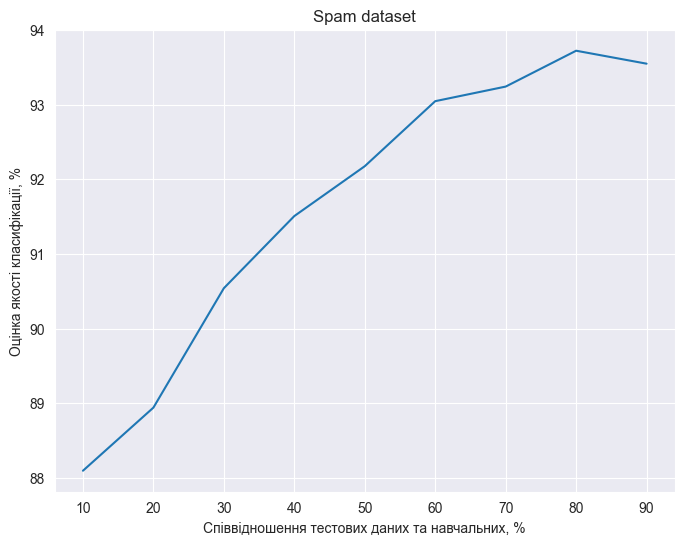

In [508]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
x = np.arange(0.1, 1, 0.1)*100
accuracy = []

for ratio in x:
    X_train, X_test, y_train, y_test = get_train_test(X1, y1, ratio/100)
    all_words = get_all_words(X_train)
    ham_words = get_cl_words(X_train, y_train, 0)
    spam_words = get_cl_words(X_train, y_train, 1)
    probs = get_probs(all_words, [ham_words, spam_words])
    def_probs = [y_train.value_counts()[i]/len(y_train) for i in range(len(encoded_type1))]
    y_pred_class = get_prediction(X_test, probs, def_probs)
    accuracy.append(metrics.accuracy_score(y_test, y_pred_class)*100)

ax.plot(x, accuracy)
ax.set_xlabel('Співвідношення тестових даних та навчальних, %', fontsize=10)
ax.set_ylabel('Оцінка якості класифікації, %', fontsize=10)
ax.set_title('Spam dataset')
plt.show()

In [509]:
titles = pd.read_csv("ds2/titles.csv")
titles.dropna(how="any", inplace=True, axis=1)
titles = titles[["title", "type"]]
titles

,title,type
0,Five Came Back: The Reference Films,SHOW
1,Rocky,MOVIE
2,Grease,MOVIE
3,The Sting,MOVIE
4,Rocky II,MOVIE
...,...,...
6132,عبود في البيت,MOVIE
6133,Sweetie,MOVIE
6134,Sommore: Queen Chandelier,MOVIE
6135,All Na Vibes,MOVIE


In [510]:
titles.groupby('type').describe()

title                     
      count unique      top freq
type                            
MOVIE  3831   3818    Cargo    2
SHOW   2306   2293  Top Boy    2

In [511]:
label_encoder2 = LabelEncoder()
titles['type_num'] = label_encoder2.fit_transform(titles.type)
encoded_type2 = dict(enumerate(label_encoder2.classes_))
encoded_type2

{0: 'MOVIE', 1: 'SHOW'}

In [512]:
titles.head()

,title,type,type_num
0,Five Came Back: The Reference Films,SHOW,1
1,Rocky,MOVIE,0
2,Grease,MOVIE,0
3,The Sting,MOVIE,0
4,Rocky II,MOVIE,0


In [513]:
titles['clean_title'] = titles.title.apply(text_process)

titles.head()

,title,type,type_num,clean_title
0,Five Came Back: The Reference Films,SHOW,1,five came back reference films
1,Rocky,MOVIE,0,rocky
2,Grease,MOVIE,0,grease
3,The Sting,MOVIE,0,sting
4,Rocky II,MOVIE,0,rocky ii


In [523]:
X2 = titles.clean_title
y2 = titles.type_num
print(X2.shape)
print(y2.shape)

X_train2, X_test2, y_train2, y_test2 = get_train_test(X2, y2, 0.7)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(6137,)
(6137,)
(4295,)
(1842,)
(4295,)
(1842,)


In [524]:
all_words2 = get_all_words(X_train2)
movie_words = get_cl_words(X_train2, y_train2, 0)
show_words = get_cl_words(X_train2, y_train2, 1)
movie_words.most_common(10)

[('love', 61),
 ('christmas', 45),
 ('man', 28),
 ('movie', 28),
 ('one', 27),
 ('story', 27),
 ('live', 25),
 ('life', 22),
 ('world', 20),
 ('girl', 20)]

In [525]:
probs2 = get_probs(all_words2, [movie_words, show_words])
def_probs2 = [y_train2.value_counts()[i]/len(y_train2) for i in range(len(encoded_type2))]
print(def_probs2)
probs2

[0.6246798603026775, 0.3753201396973225]


{'layla': [0.8333333333333334, 0.16666666666666666],
 'sam': [0.6111111111111112, 0.3888888888888889],
 'cat': [0.4166666666666667, 0.5833333333333334],
 'real': [0.7857142857142857, 0.21428571428571427],
 'world': [0.5540540540540541, 0.44594594594594594],
 'ever': [0.4642857142857143, 0.5357142857142857],
 'happy': [0.7083333333333334, 0.2916666666666667],
 'heaven': [0.3, 0.7],
 'official': [0.5, 0.5],
 'blessing': [0.25, 0.75],
 'los': [0.75, 0.25],
 'tigres': [0.75, 0.25],
 'del': [0.55, 0.45],
 'norte': [0.75, 0.25],
 'folsom': [0.75, 0.25],
 'prison': [0.625, 0.375],
 'cooked': [0.25, 0.75],
 'cannabis': [0.25, 0.75],
 'endless': [0.625, 0.375],
 'love': [0.5694444444444444, 0.4305555555555556],
 'strong': [0.875, 0.125],
 'project': [0.6428571428571429, 0.35714285714285715],
 'papa': [0.9, 0.1],
 'busted': [0.25, 0.75],
 'carmen': [0.5, 0.5],
 'sandiego': [0.5, 0.5],
 'ivy': [0.8333333333333334, 0.16666666666666666],
 'bean': [0.8333333333333334, 0.16666666666666666],
 'women':

In [526]:
y_pred_class2 = get_prediction(X_test2, probs2, def_probs2)
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test2, y_pred_class2))

=======Accuracy Score===========
0.6460369163952225


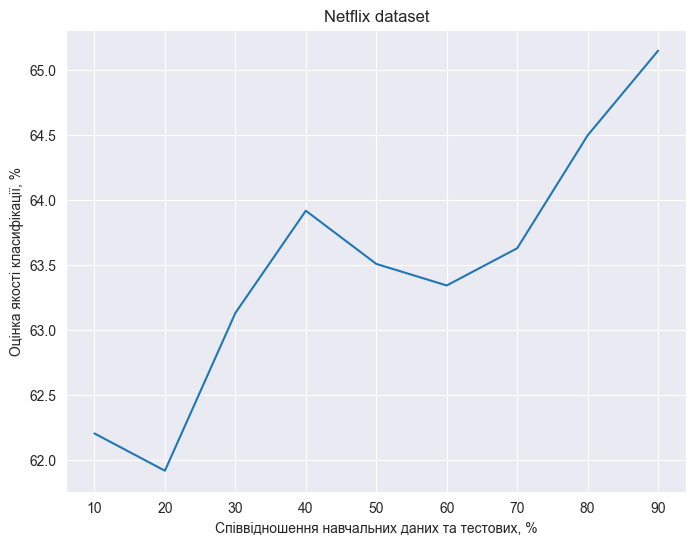

In [551]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
x = np.arange(0.1, 1, 0.1)*100
accuracy = []

for ratio in x:
    X_train, X_test, y_train, y_test = get_train_test(X2, y2, ratio/100)
    all_words = get_all_words(X_train)
    movie_words = get_cl_words(X_train, y_train, 0)
    show_words = get_cl_words(X_train, y_train, 1)
    probs = get_probs(all_words, [movie_words, show_words])
    def_probs = [y_train.value_counts()[i]/len(y_train) for i in range(len(encoded_type2))]
    y_pred_class = get_prediction(X_test, probs, def_probs)
    accuracy.append(metrics.accuracy_score(y_test, y_pred_class)*100)

ax.plot(x, accuracy)
ax.set_xlabel('Співвідношення навчальних даних та тестових, %', fontsize=10)
ax.set_ylabel('Оцінка якості класифікації, %', fontsize=10)
ax.set_title('Netflix dataset')
plt.show()

In [553]:
music = pd.read_csv("ds1/Spotify_Youtube.csv")
music.dropna(how="any", inplace=True, axis=1)
music = music[["Track", "Album_type"]]
music

,Track,Album_type
0,Feel Good Inc.,album
1,Rhinestone Eyes,album
2,New Gold (feat. Tame Impala and Bootie Brown),single
3,On Melancholy Hill,album
4,Clint Eastwood,album
...,...,...
20713,JUST DANCE HARDSTYLE,single
20714,SET FIRE TO THE RAIN HARDSTYLE,single
20715,OUTSIDE HARDSTYLE SPED UP,single
20716,ONLY GIRL HARDSTYLE,single


In [554]:
label_encoder3 = LabelEncoder()
music['type_num'] = label_encoder3.fit_transform(music.Album_type)
encoded_type3 = dict(enumerate(label_encoder3.classes_))
encoded_type3

{0: 'album', 1: 'compilation', 2: 'single'}

In [555]:
music['clean_track'] = music.Track.apply(text_process)

music.head()

,Track,Album_type,type_num,clean_track
0,Feel Good Inc.,album,0,feel good inc
1,Rhinestone Eyes,album,0,rhinestone eyes
2,New Gold (feat. Tame Impala and Bootie Brown),single,2,new gold feat tame impala bootie brown
3,On Melancholy Hill,album,0,melancholy hill
4,Clint Eastwood,album,0,clint eastwood


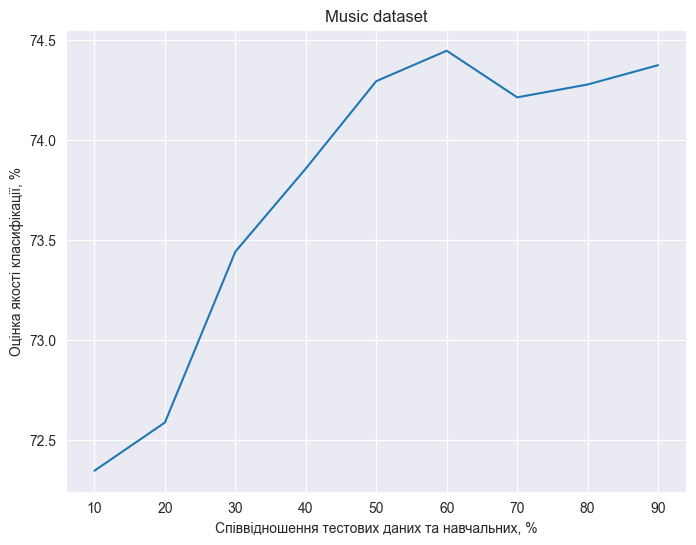

In [559]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
x = np.arange(0.1, 1, 0.1)*100
accuracy = []
X3 = music.clean_track
y3 = music.type_num

for ratio in x:
    X_train, X_test, y_train, y_test = get_train_test(X3, y3, ratio/100)
    all_words = get_all_words(X_train)
    album_words = get_cl_words(X_train, y_train, 0)
    compilation_words = get_cl_words(X_train, y_train, 1)
    single_words = get_cl_words(X_train, y_train, 2)
    probs = get_probs(all_words, [album_words, compilation_words, single_words])
    def_probs = [y_train.value_counts()[i]/len(y_train) for i in range(len(encoded_type3))]
    y_pred_class = get_prediction(X_test, probs, def_probs)
    accuracy.append(metrics.accuracy_score(y_test, y_pred_class)*100)

ax.plot(x, accuracy)
ax.set_xlabel('Співвідношення тестових даних та навчальних, %', fontsize=10)
ax.set_ylabel('Оцінка якості класифікації, %', fontsize=10)
ax.set_title('Music dataset')
plt.show()